In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0, 0.5, 'Minimum temperature')

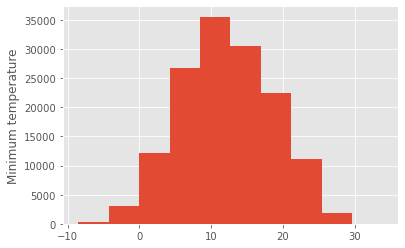

In [7]:
plt.hist(df["MinTemp"]);
plt.ylabel("Minimum temperature")

Text(0, 0.5, 'Maximum temperature')

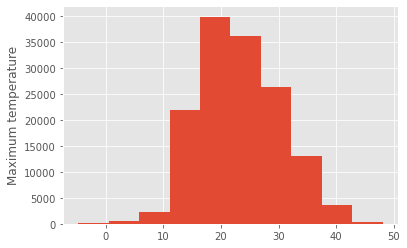

In [6]:
plt.hist(df["MaxTemp"]);
plt.ylabel("Maximum temperature")

(0.0, 20.0)

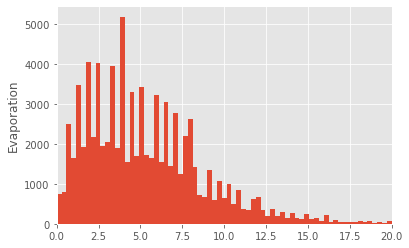

In [7]:
plt.hist(df["Evaporation"], bins = 500);
plt.ylabel("Evaporation")
plt.xlim(0,20)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df1 = df.copy(deep= True)
# removing all entries with no values in rain tomorrow
df1 = df1[~df1["RainTomorrow"].isna()]

In [9]:
print(df.shape)
print(df1.shape)

(145460, 23)
(142193, 23)


(0.0, 20.0)

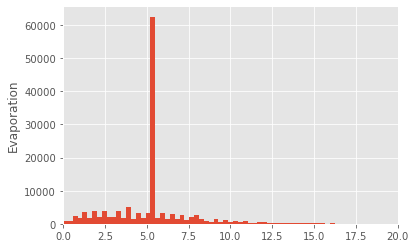

In [6]:
df1["Evaporation"] = df1["Evaporation"].replace(np.NaN, df1["Evaporation"].mean())
plt.hist(df1["Evaporation"], bins = 500);
plt.ylabel("Evaporation")
plt.xlim(0,20)

In [6]:
# Replacing Nans with mode values and medians in case of integers.
for i in list(df1):
    if i != "Date":
        if df1[df1[i].isna()].shape[0] !=0:
            if df1[i].dtype == 'O':
                df1[i] = df1[i].replace(np.NaN, df1[i].mode()[0])
            else:
                df1[i] = df1[i].replace(np.NaN, df1[i].mean())

In [8]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [7]:
df1["Month"] = pd.to_numeric(df1["Date"].str.split("-", expand = True)[1])

Text(0.5, 0, 'Month')

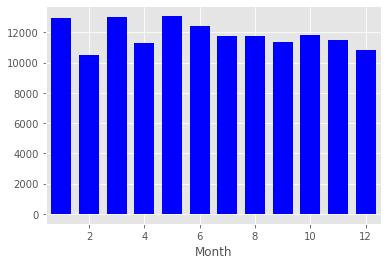

In [8]:
v, c = np.unique(df1["Month"], return_counts =True)
plt.vlines(v, 0, c, color = 'blue', lw = 20)
plt.xlabel("Month")

In [9]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for i in list(df):
    if df[i].dtype == 'O':
        le.fit(df1[i]) 
        df1[i]=le.transform(df1[i]) 

In [10]:
df1.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,1924.782908,23.740655,12.186400,23.226784,2.349974,5.469824,7.624853,8.059039,39.984292,7.000316,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.221213,0.224181,6.402544
std,886.165810,14.237503,6.388924,7.109554,8.423217,3.168114,2.734927,4.694267,13.138385,4.514678,...,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.415065,0.417043,3.426506
min,0.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000
25%,1162.000000,11.000000,7.600000,17.900000,0.000000,4.000000,7.624853,4.000000,31.000000,3.000000,...,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,3.000000
50%,1945.000000,24.000000,12.000000,22.700000,0.000000,5.469824,7.624853,9.000000,39.000000,7.000000,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000,0.000000,6.000000
75%,2691.000000,36.000000,16.800000,28.200000,0.800000,5.469824,8.700000,13.000000,46.000000,11.000000,...,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.000000,9.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,12.000000


Text(0.5, 0, 'Location')

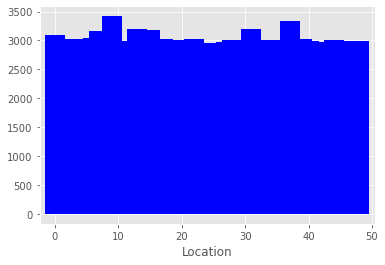

In [21]:
v, c = np.unique(df1["Location"], return_counts =True)
plt.vlines(v, 0, c, color = 'blue', lw = 20)
plt.xlabel("Location")

Text(0.5, 0, 'WindGustDir')

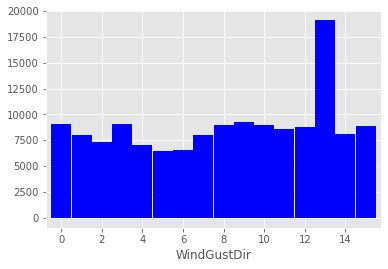

In [22]:
v, c = np.unique(df1["WindGustDir"], return_counts =True)
plt.vlines(v, 0, c, color = 'blue', lw = 20)
plt.xlabel("WindGustDir")

In [15]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,6.402544
std,6.388924,7.109554,8.423217,3.168114,2.734927,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,3.426506
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,3.000000
50%,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,6.000000
75%,16.800000,28.200000,0.800000,5.469824,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,12.000000


In [21]:
X = df1.drop('RainTomorrow', axis = 1)
y = df1['RainTomorrow']

In [35]:
list(X)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Month']

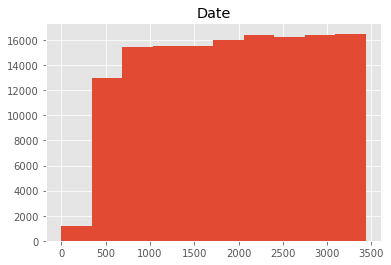

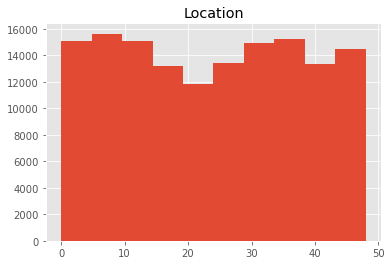

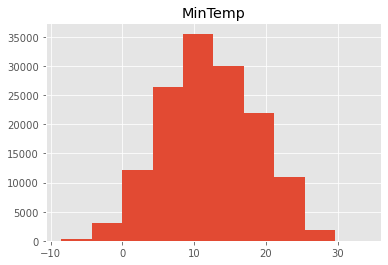

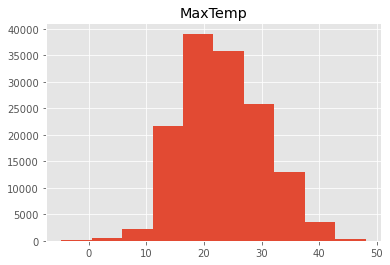

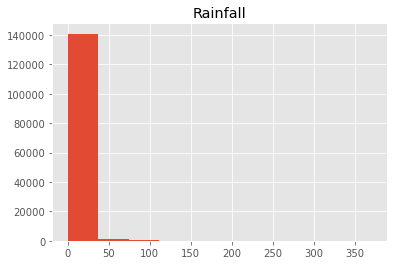

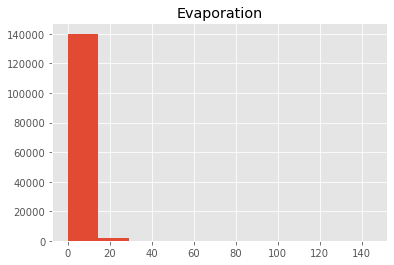

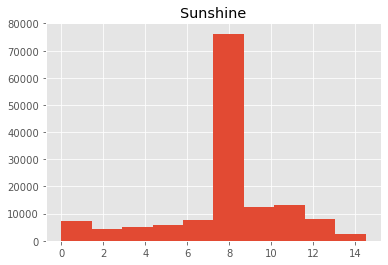

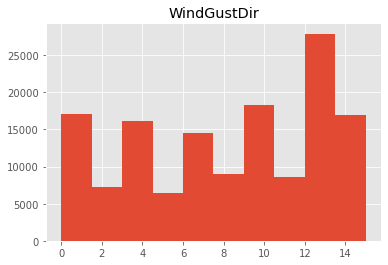

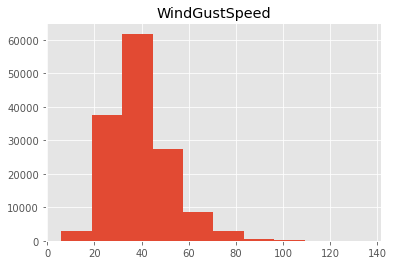

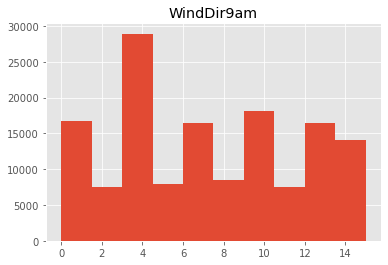

In [23]:
for i in list(df1)[:10]:
    plt.figure()
    plt.title(i)
    plt.hist(df1[i]);

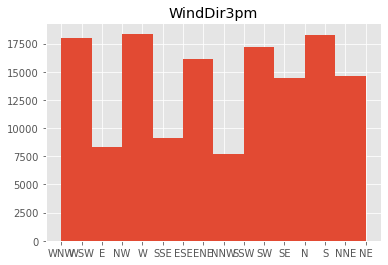

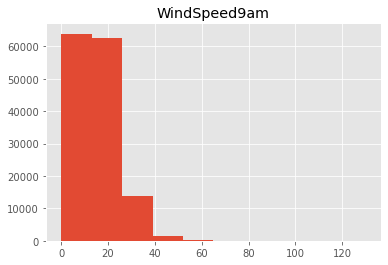

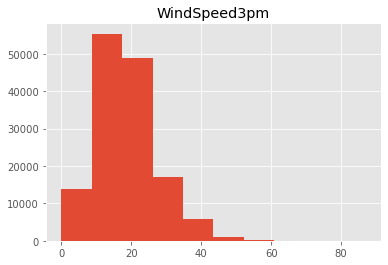

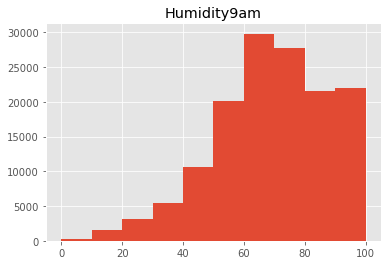

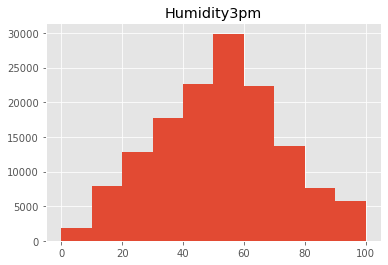

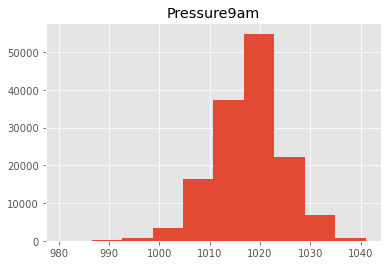

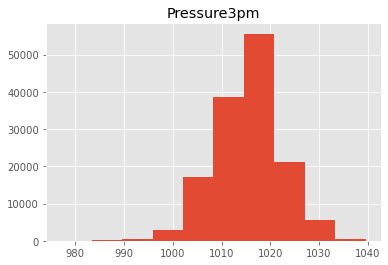

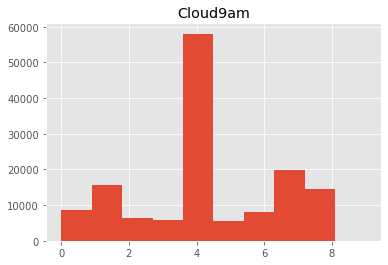

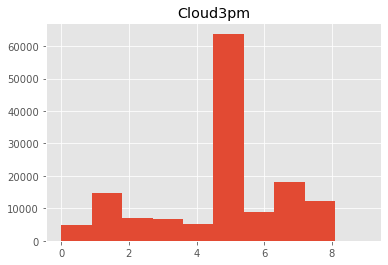

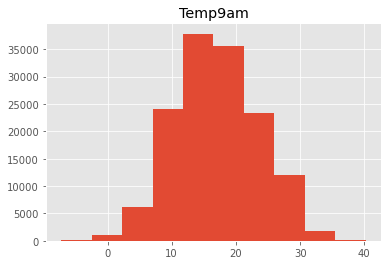

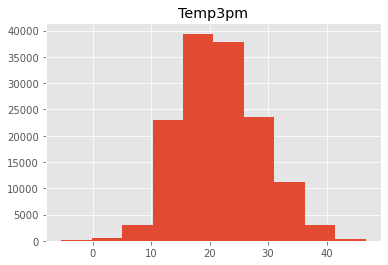

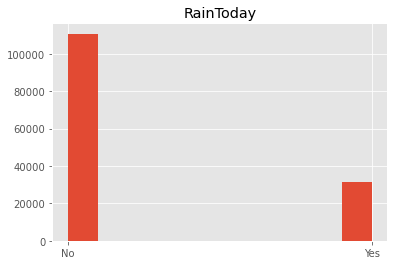

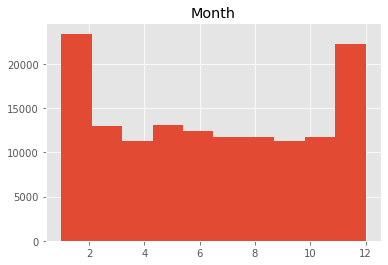

In [24]:
for i in list(X)[10:]:
    plt.figure()
    plt.title(i)
    plt.hist(X[i]);

In [24]:
# Before any scaling.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

0.8415907732339393
0.8244664017722142
0.8024192130524983
0.7886704877105384
0.8268926474207954
0.8176096205914414
0.3359119518970428


/home/amandlik/.conda/envs/ABC_II/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Score
3,Logistic Regression,0.841591
5,Stochastic Gradient Decent,0.826893
0,KNN,0.824466
2,Random Forest Classifier,0.817610
4,Naive Bayes,0.802419
6,Decision Tree,0.788670
1,Linear SVC,0.335912


In [25]:
scaler = MinMaxScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

0.8438763669608637
0.8193677696121523
0.802524701993741
0.7897605401033791
0.841696262175182
0.8172579907872991
0.8422940328422237


,Model,Score
3,Logistic Regression,0.843876
1,Linear SVC,0.842294
5,Stochastic Gradient Decent,0.841696
0,KNN,0.819368
2,Random Forest Classifier,0.817258
4,Naive Bayes,0.802525
6,Decision Tree,0.789761


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)

In [27]:
models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Logistic Regression,0.843595
1,Linear SVC,0.842751
5,Stochastic Gradient Decent,0.839235
0,KNN,0.822673
2,Random Forest Classifier,0.817117
4,Naive Bayes,0.802525
6,Decision Tree,0.788073


In [ ]:
# Trying the oversampling method:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=102)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_accu = metrics.accuracy_score(y_test,y_pred)
print(logreg_accu)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accu = metrics.accuracy_score(y_test,y_pred)
print(knn_accu)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gnv_accu = metrics.accuracy_score(y_test,y_pred)
print(gnv_accu)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree_accu = metrics.accuracy_score(y_test,y_pred)
print(dtree_accu)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accu = metrics.accuracy_score(y_test,y_pred)
print(sgd_accu)
rfc=RandomForestClassifier(n_estimators=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accu = metrics.accuracy_score(y_test,y_pred)
print(rfc_accu)
lsvc = LinearSVC()
lsvc.fit(X_test,y_test)
y_pred=lsvc.predict(X_test)
lsvc_accu = metrics.accuracy_score(y_test,y_pred)
print(lsvc_accu)


In [29]:
models = pd.DataFrame({
    'Model': ['KNN', 'Linear SVC', "Random Forest Classifier", 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [knn_accu, lsvc_accu, rfc_accu, logreg_accu,
              gnv_accu, sgd_accu, dtree_accu]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.882566
6,Decision Tree,0.839962
2,Random Forest Classifier,0.805403
3,Logistic Regression,0.783239
5,Stochastic Gradient Decent,0.782673
1,Linear SVC,0.782423
4,Naive Bayes,0.749768
